### **회귀 분석**

**1. MAE (Mean Absolute Error)**
- 실제 값과 예측 값의 차이(Error)를 절대값으로 변환해 평균화

- MAE는 에러에 절대값을 취하기 때문에 에러의 크기 그대로 반영된다. 그러므로 예측 결과물의 에러가 10이 나온 것이 5로 나온 것보다 2배가 나쁜 도메인에서 쓰기 적합

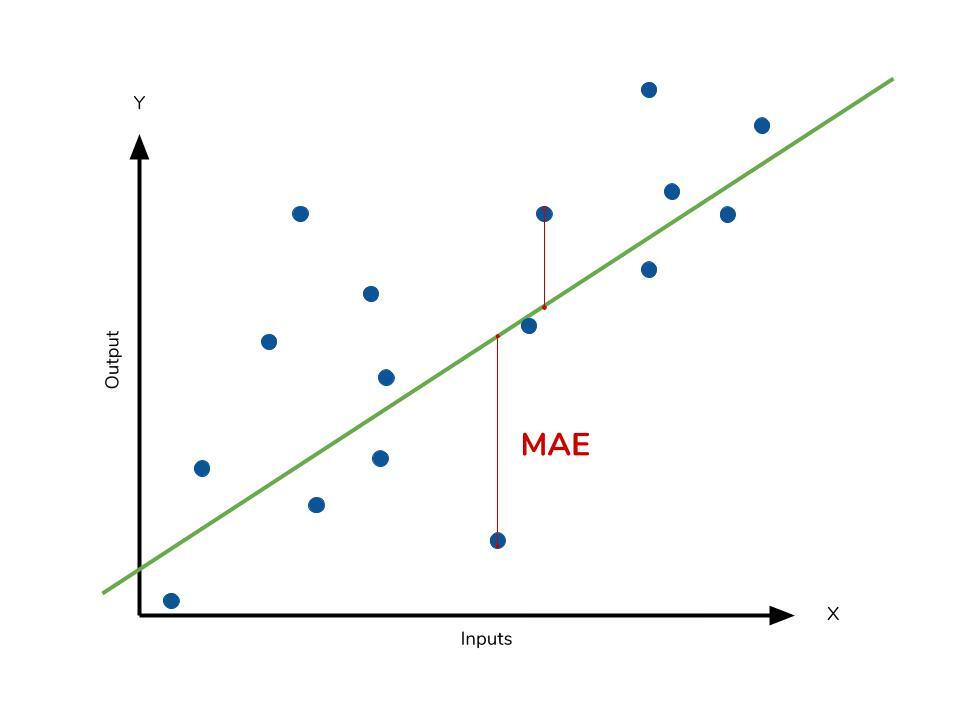

**2. MSE (Mean Squared Error)**
- 실제 값과 예측 값의 차이를 제곱해 평균화

- 예측값과 실제값 차이의 면적의 합

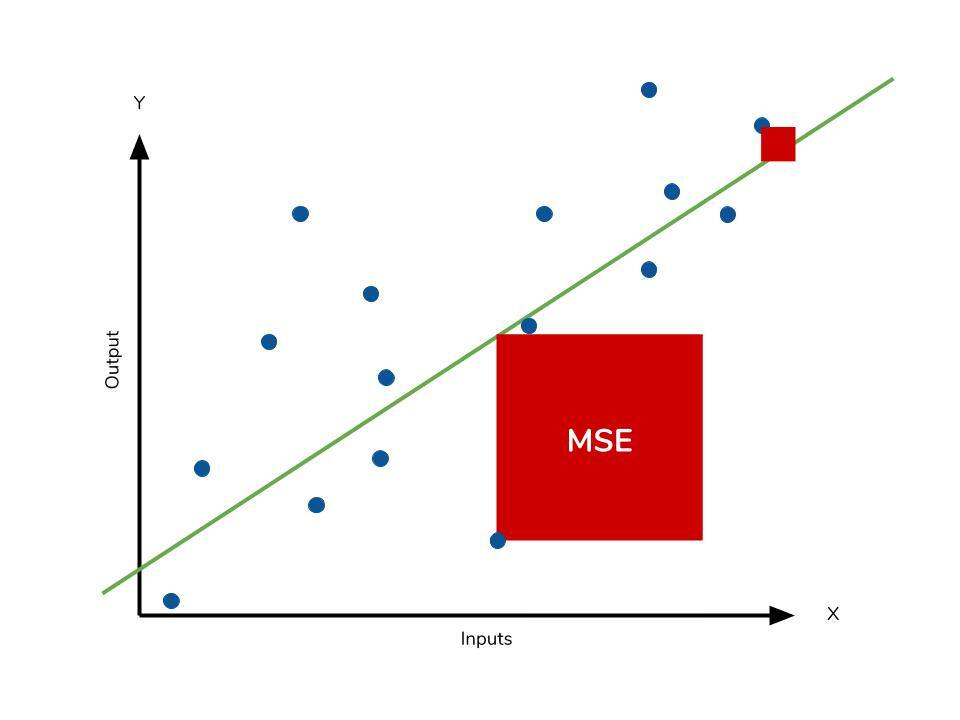

## **자동차 연비 예측**

In [ ]:
import numpy as np
import pandas as pd
from sklearn.linear_model import LinearRegression # 선형 회귀
from sklearn.model_selection import train_test_split
from sklearn.metrics import mean_squared_error, mean_absolute_error
import seaborn as sns
import matplotlib.pyplot as plt
import warnings

warnings.filterwarnings(action='ignore') 

In [ ]:
df = sns.load_dataset('mpg') # mile per gallon

In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 398 entries, 0 to 397
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   mpg           398 non-null    float64
 1   cylinders     398 non-null    int64  
 2   displacement  398 non-null    float64
 3   horsepower    392 non-null    float64
 4   weight        398 non-null    int64  
 5   acceleration  398 non-null    float64
 6   model_year    398 non-null    int64  
 7   origin        398 non-null    object 
 8   name          398 non-null    object 
dtypes: float64(4), int64(3), object(2)
memory usage: 28.1+ KB


In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
df['origin'].unique()

array(['usa', 'japan', 'europe'], dtype=object)

In [ ]:
df.isnull().sum()

mpg             0
cylinders       0
displacement    0
horsepower      6
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df = df.dropna()

In [ ]:
df.isna().sum()

mpg             0
cylinders       0
displacement    0
horsepower      0
weight          0
acceleration    0
model_year      0
origin          0
name            0
dtype: int64

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,name
0,18.0,8,307.0,130.0,3504,12.0,70,usa,chevrolet chevelle malibu
1,15.0,8,350.0,165.0,3693,11.5,70,usa,buick skylark 320
2,18.0,8,318.0,150.0,3436,11.0,70,usa,plymouth satellite
3,16.0,8,304.0,150.0,3433,12.0,70,usa,amc rebel sst
4,17.0,8,302.0,140.0,3449,10.5,70,usa,ford torino
...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,ford mustang gl
394,44.0,4,97.0,52.0,2130,24.6,82,europe,vw pickup
395,32.0,4,135.0,84.0,2295,11.6,82,usa,dodge rampage
396,28.0,4,120.0,79.0,2625,18.6,82,usa,ford ranger


In [ ]:
df.drop('name', axis=1, inplace=True)

In [ ]:
# usa, japan, europe 가중치 주지 않고 데이터 처리하는 법
df_origin = pd.get_dummies(df['origin'])

In [ ]:
df = pd.concat([df, df_origin], axis=1)

In [ ]:
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,origin,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,usa,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,usa,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,usa,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,usa,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,usa,0,0,1
...,...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,usa,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,europe,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,usa,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,usa,0,0,1


In [ ]:
# 그냥 삭제하는 법
df.drop('origin', axis=1, inplace=True)
df

,mpg,cylinders,displacement,horsepower,weight,acceleration,model_year,europe,japan,usa
0,18.0,8,307.0,130.0,3504,12.0,70,0,0,1
1,15.0,8,350.0,165.0,3693,11.5,70,0,0,1
2,18.0,8,318.0,150.0,3436,11.0,70,0,0,1
3,16.0,8,304.0,150.0,3433,12.0,70,0,0,1
4,17.0,8,302.0,140.0,3449,10.5,70,0,0,1
...,...,...,...,...,...,...,...,...,...,...
393,27.0,4,140.0,86.0,2790,15.6,82,0,0,1
394,44.0,4,97.0,52.0,2130,24.6,82,1,0,0
395,32.0,4,135.0,84.0,2295,11.6,82,0,0,1
396,28.0,4,120.0,79.0,2625,18.6,82,0,0,1


In [ ]:
X = df[['cylinders',	'displacement',	'horsepower',	'weight',	'acceleration',	'model_year', 'europe', 'japan', 'usa']]

In [ ]:
Y= df['mpg']

In [ ]:
X_train, X_test, Y_train, Y_test = train_test_split(X, Y, train_size=0.8, random_state =0)

In [ ]:
lr = LinearRegression()

In [ ]:
lr.fit(X_train, Y_train)

LinearRegression()

In [ ]:
Y_predict = lr.predict(X_test)

In [ ]:
Y_predict

array([25.51469604, 25.27886826, 10.53305685, 32.15477571, 32.95814026,
       23.43992958, 34.21485266, 26.88615822, 20.23865435, 26.51556003,
       28.55590056, 13.70730486, 24.86251701,  8.78102974, 16.82256734,
       32.92133689, 26.61239728, 12.68417729, 26.27106596, 26.86332078,
       20.99953477, 17.83198525, 23.53930949, 26.91428864, 32.56194353,
       11.23834236, 28.62475595, 25.45513011, 22.92977219, 14.89347866,
       22.18050151, 30.74416878, 24.77460688, 29.027514  , 21.77982546,
       29.18586549, 28.24585686, 12.25338166, 14.8345176 , 10.63112153,
       14.01825216, 34.3497955 , 30.51149418, 13.54998863, 31.61464295,
       15.50609429, 29.91056317, 10.62060468, 17.48901497, 22.13984222,
       27.55159048, 15.38444954,  8.3289872 , 22.92948054, 32.35007905,
       27.08711398, 26.11439538, 20.75648743, 31.54863388, 24.08580553,
       18.92135439, 28.15084321, 31.99809453, 10.58425642, 26.57587978,
       16.6984705 , 10.62006916, 28.89637066, 21.67370442, 33.12

In [ ]:
Y_test

146    28.0
282    22.3
69     12.0
378    38.0
331    33.8
       ... 
101    23.0
65     14.0
56     26.0
262    19.2
216    31.5
Name: mpg, Length: 79, dtype: float64

In [ ]:
mse = mean_squared_error(Y_test, Y_predict)

In [ ]:
mse # 분산 값

10.022424640636547

In [ ]:
RMSE = np.sqrt(mse) # 표준편차

In [ ]:
RMSE # +- 3.4 정도의 오차를 보이고 있다

3.1658213216536

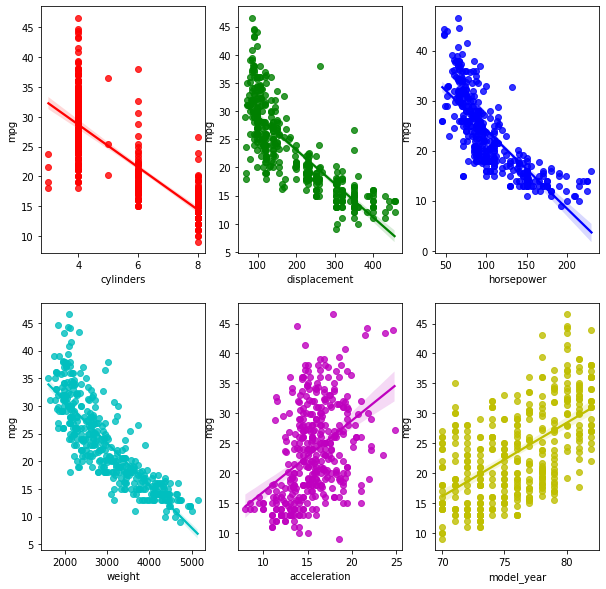

In [ ]:
plt.figure(figsize=(10, 10))
plt.subplot(2, 3, 1)
sns.regplot(x='cylinders', y='mpg', data=df, color='r')
plt.subplot(2, 3, 2)
sns.regplot(x='displacement', y='mpg', data=df, color='g')
plt.subplot(2, 3, 3)
sns.regplot(x='horsepower', y='mpg', data=df, color='b')
plt.subplot(2, 3, 4)
sns.regplot(x='weight', y='mpg', data=df, color='c')
plt.subplot(2, 3, 5)
sns.regplot(x='acceleration', y='mpg', data=df, color='m')
plt.subplot(2, 3, 6)
sns.regplot(x='model_year', y='mpg', data=df, color='y')

In [ ]:
cylinders_1 = int(input('cylinders:'))
displacement_1 = int(input('displacement:'))
horsepower_1 = int(input('horsepower:'))
weight_1 = int(input('weight:'))
acceleration_1 = int(input('acceleration:'))
model_year_1 = int(input('model_year:'))

cylinders:1
displacement:2
horsepower:10000


In [ ]:
lr.predict([[cylinders_1, displacement_1, horsepower_1, weight_1, acceleration_1, model_year_1, 1, 0, 0]])

array([-49.13990707])